# Movie Recommendation System

### The Question
How do we show most anticipated and recommended list of movies to an user based on their choice and search for a particular movie in an inclusive and optimized way?

### Motivation
One reason is that they can help people find new and interesting movies to watch. They can also help people avoid watching movies that they might not enjoy. Additionally, movie recommendation systems can help movie studios and distributors make better decisions about which movies to produce and release.

### Approach
There are different kinds of movie recommendations followed in the market. Few of them are Content Based Recommendation, Collaborative Filtering and Hybrid. In this project, effor is to implement the Content Based recommendation, where we recommend the movies based on the content of the movie that user selects. In addition to the recommended movie, also shows the user the overall top five popular movies that users may like based on the popularity column of the dataset.

### Our hypothesis
Our recommended movies will be shown based on the user entry choice which implies that the top movies in which the mega tag field in the data set greatly match the particular tag feild of the input movie, we calculate the mega tag field by using 500 entries in the dataset.

### Data
Real world dataset from Kaggle. Dataset link:
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

* importing required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

* reading data from drive and storing them as pandas dataframes

In [5]:
df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_credits = pd.read_csv('tmdb_5000_credits.csv')

* checking the shape of the dataframes

In [6]:
print(df_movies.shape,df_credits.shape)

(4803, 20) (4803, 4)


* checking the first 5 rows in the dataframe df_movies

In [7]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


* checking first 5 rows in dataframe df_credits

In [8]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


* merge both the dataframes, 'df_movies', 'df_credits' into a single dataframe 'movies'

In [9]:
movies = df_movies.merge(df_credits,on='title',how='inner') # using right join to merge the two dataframes

* checking first 5 rows in dataframe movies

In [10]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


* picking the top 5 popular movies based on the column 'popularity'

In [11]:
to_5_popularity = list(sorted(movies['popularity'],reverse=True)[:5])


* taking the top 5 popular movie_id as key and title as value

In [12]:
popularity = list(enumerate(movies['popularity']))

pop_index=[]
for i in sorted(popularity,reverse=True,key=lambda x: x[1])[:5]:
  pop_index.append(i[0])

pop_movies_id = list(movies.iloc[pop_index]['movie_id']) # top 5 popular movie_id
pop_title = list(movies.iloc[pop_index]['title']) # top 5 popular movie titles

pop_movie_dict=dict() # storing the top 5 movie_id and title in a dictionary
for i in range(len(pop_movies_id)):
    pop_movie_dict[pop_movies_id[i]]=pop_title[i]

* importing pickle library

In [13]:
import pickle

* converting the pop_movie_dict to a pickle file

In [14]:
pickle.dump(pop_movie_dict,open('popular_movies.pkl','wb'))

Out of all the columns that movies dataframe has, we picked the most important fields for the next steps. They are:


* 'movie_id'
* 'title'
* 'genres'
* 'keywords'
* 'overview'
* 'cast'
* 'crew'

### considering only the columns that are required

In [15]:
new_movies = movies[['movie_id','title','genres','keywords','overview','cast','crew']]

In [16]:
new_movies.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


* checking the null values in the dataframe

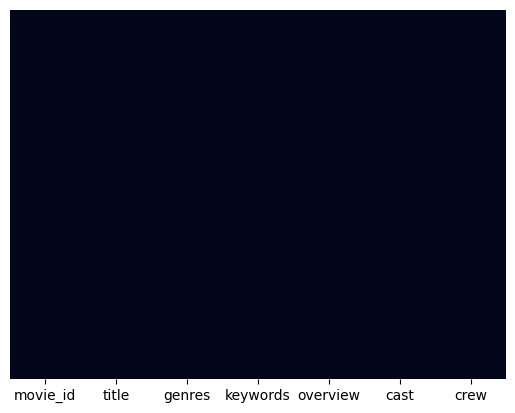

In [17]:
sns.heatmap(new_movies.isna(), cbar=None, yticklabels=False)
plt.show()

In [18]:
new_movies.isna().sum()

movie_id    0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

* column 'overview' has 3 null values. Let's drop them

In [19]:
new_movies.dropna(inplace=True)

<ipython-input-19-520425b288de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.dropna(inplace=True)


In [20]:
new_movies.isna().sum()

movie_id    0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [21]:
new_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   genres    4806 non-null   object
 3   keywords  4806 non-null   object
 4   overview  4806 non-null   object
 5   cast      4806 non-null   object
 6   crew      4806 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.4+ KB


checking the data in the columns

In [22]:
print(type(new_movies['genres'][0]))
print(type(new_movies['keywords'][0]))
print(type(new_movies['cast'][0]))
print(type(new_movies['crew'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


* columns 'genres', 'keywords', 'cast', 'crew' are a list of dictionaries that are stored as string. We need to convert it into a list.

In [23]:
import ast

In [24]:
def remove_string_notation(x):
  '''this function returns the literal after removing the string format'''
  return ast.literal_eval(x)

In [25]:
columns_to_convert = ['genres', 'keywords', 'cast', 'crew']
for column in columns_to_convert:
    print(column)
    new_movies.loc[:,column] = new_movies[column].apply(remove_string_notation)

genres
keywords


<ipython-input-25-6027e1fe77db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.loc[:,column] = new_movies[column].apply(remove_string_notation)


cast
crew


In [26]:
new_movies.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","In the 22nd century, a paraplegic Marine is di...","[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","Captain Barbossa, long believed to be dead, ha...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",A cryptic message from Bond’s past sends him o...,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",Following the death of District Attorney Harve...,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...","John Carter is a war-weary, former military ca...","[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [27]:
def get_name(y):
  '''this custom function was returns the list of values with name as key(designed specially for 'genres' and 'keywords')'''
  li=[]
  for i in y:
    li.append(i['name'])
  return li

* taking the 'name' key's value and storing it as the list of values for columns'genres' and 'keywords'

In [28]:
new_movies.loc[:,'genres'] = new_movies['genres'].apply(get_name)
new_movies.loc[:,'keywords'] = new_movies['keywords'].apply(get_name)

<ipython-input-28-b50ccf3ca256>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.loc[:,'genres'] = new_movies['genres'].apply(get_name)
<ipython-input-28-b50ccf3ca256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.loc[:,'keywords'] = new_movies['keywords'].apply(get_name)


In [29]:
new_movies.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [30]:
new_movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

* splitting 'overview' from string to list of strings

In [31]:
def overview_split(overview):
    '''given a sentence, this function returns a list of words that are in the sentence'''
    return overview.split()

In [32]:
new_movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [33]:
# new_movies['overview'] = new_movies['overview'].apply(overview_split)
new_movies.loc[:,'overview'] = new_movies['overview'].apply(overview_split)

<ipython-input-33-4a9482cc052b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.loc[:,'overview'] = new_movies['overview'].apply(overview_split)


In [34]:
new_movies['overview'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

* to get the top 3 cast members

In [35]:
def get_top_3_cast(z):
  '''this function return the first 3 crew members'''
  c = 1
  li=[]
  for i in z:
    if c <=3:
      c+=1
      li.append(i['name'])
  return li

In [36]:
new_movies.loc[:,'cast'] = new_movies['cast'].apply(get_top_3_cast)

<ipython-input-36-02a5c4554c50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.loc[:,'cast'] = new_movies['cast'].apply(get_top_3_cast)


* to get the director from the 'crew' column

In [37]:
def get_director(v):
  '''this custom function returns the director'''
  li=[]
  for i in v:
    if i['job'] == 'Director':
      li.append(i['name'])
  return li

In [38]:
new_movies.loc[:,'crew'] = new_movies['crew'].apply(get_director)

<ipython-input-38-23f052de16c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.loc[:,'crew'] = new_movies['crew'].apply(get_director)


In [39]:
new_movies.head()

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


* Now that the columns 'genres', 'keywords', 'overview', 'crew', 'cast' are in the format of list, let's create a new column called 'tags' which hold all the above columns data.

In [40]:
new_movies['tags'] = new_movies['genres']+new_movies['keywords']+new_movies['overview']+new_movies['cast']+new_movies['crew']

<ipython-input-40-8ac6524def0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['genres']+new_movies['keywords']+new_movies['overview']+new_movies['cast']+new_movies['crew']


In [41]:
new_movies['tags'][0]

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'James Cameron']

* creating the final dataframe 'fin_movies' that stores just the 'movie_id', 'title' and 'tags'

In [42]:
fin_movies = new_movies[['movie_id','title','tags']]

In [43]:
fin_movies.head()

,movie_id,title,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, ocean, drug abuse..."
2,206647,Spectre,"[Action, Adventure, Crime, spy, based on novel..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, dc comics, cr..."
4,49529,John Carter,"[Action, Adventure, Science Fiction, based on ..."


* let's make the tags into a string for the further process

In [44]:
fin_movies['tags'] = fin_movies['tags'].apply(lambda x: ' '.join(x))

<ipython-input-44-cecaf2b4341c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_movies['tags'] = fin_movies['tags'].apply(lambda x: ' '.join(x))


In [45]:
fin_movies.head()

,movie_id,title,tags
0,19995,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,206647,Spectre,Action Adventure Crime spy based on novel secr...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,49529,John Carter,Action Adventure Science Fiction based on nove...


In [46]:
fin_movies['tags'] = fin_movies['tags'].str.lower()

<ipython-input-46-2a735a29dc03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_movies['tags'] = fin_movies['tags'].str.lower()


In [47]:
fin_movies['tags'][0]

'action adventure fantasy science fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. sam worthington zoe saldana sigourney weaver james cameron'

In [48]:
fin_movies.head()

,movie_id,title,tags
0,19995,Avatar,action adventure fantasy science fiction cultu...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action ocean drug abuse exot...
2,206647,Spectre,action adventure crime spy based on novel secr...
3,49026,The Dark Knight Rises,action crime drama thriller dc comics crime fi...
4,49529,John Carter,action adventure science fiction based on nove...


* importing PorterStemmer from nltk.stem to apply stemming on the column 'tags'

In [49]:
from nltk.stem import PorterStemmer

In [50]:
ps = PorterStemmer()

In [51]:
def stem(text):
  '''this function returns a string after applying stemming on it'''
  y=[]
  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

In [52]:
fin_movies['tags']=fin_movies['tags'].apply(stem)

<ipython-input-52-a4f938f8398e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_movies['tags']=fin_movies['tags'].apply(stem)


In [53]:
fin_movies.head()

,movie_id,title,tags
0,19995,Avatar,action adventur fantasi scienc fiction cultur ...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action ocean drug abus exot i...
2,206647,Spectre,action adventur crime spi base on novel secret...
3,49026,The Dark Knight Rises,action crime drama thriller dc comic crime fig...
4,49529,John Carter,action adventur scienc fiction base on novel m...


* importing CountVectorizer from sklearn.feature_extraction.text to get the vector form of the 'tags' column by removing the stop words. Considering the max_features value to be 5000

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

* after experimenting different values for max_features got good results for 5000

In [55]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vectors = cv.fit_transform(fin_movies['tags']).toarray()

* sparse matrix

In [56]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

* CountVectorizer provides the feature to see the max_features values

In [58]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zooey', 'zucker', 'zwick'], dtype=object)

* importing cosine_similarity from sklearn.metrics.pairwise to implement the cosine distance.
After getting the vectors, we are implementing

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
similarity=cosine_similarity(vectors)

In [61]:
similarity[0].shape

(4806,)

* implemented a function to recommend 5 movies based on the given movie name

In [63]:
def recommend(movie):
  '''this function returns the 5 recommendations'''
  index=fin_movies[fin_movies['title']==movie].index[0]
  distances=similarity[index]
  movies=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
  for i in movies:
    print(fin_movies.iloc[i[0]].title)

In [66]:
recommend('Spectre')

Quantum of Solace
Skyfall
Never Say Never Again
Dr. No
Die Another Day


* converting the fin_movies and similarity into pickle format for deployment.

In [68]:
pickle.dump(fin_movies,open('movies.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

* Link to the recommendations webpage : https://movie-recommendation-syst-tmdb.herokuapp.com/